## Introduction to Data Science

### Textual Analysis  

In [1]:
import os
import pathlib
import time
import codecs
import string
import re
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import urllib
import requests
from bs4 import BeautifulSoup

import nltk
import networkx as nx
import gensim
from wordcloud import WordCloud
import textract

from IPython.core.display import Image
%matplotlib inline

Specifying the path to the files

In [97]:
datapath = pathlib.Path("../datasets/")
outputs = pathlib.Path("../outputs/")

oplexicon = 'Oplexicon_v3.0/lexico_v3.0.txt'

Examinando os arquivos e pastas:

In [3]:
onlydirs = [f for f in os.listdir(datapath) if os.path.isdir(os.path.join(datapath,f)) and not f.startswith('.')]
onlydirs

['CSVs',
 'AVidhya',
 'Miscellaneous',
 'Names',
 'Oplexicon_v3.0',
 'Texts',
 'Figs']

In [4]:
corpuspath = datapath / 'Texts'
onlyfiles = [f for f in os.listdir(corpuspath) if os.path.isfile(os.path.join(corpuspath,f)) and not f.startswith('.')]
onlydirs.sort()

print('Files in the folder:')
for i, w in enumerate(onlyfiles[0:]):
    print(i+1, '--' ,w)

Files in the folder:
1 -- ARTIGOS-RBE-COM-RESUMO.xlsx
2 -- AldousHuxley_bravenewworld.pdf
3 -- MarcelProust_EmBuscadoTempoPerdido.pdf
4 -- RobertFrost_Poetry.pdf


Loading first corpus:

In [5]:
df = pd.read_excel(os.path.join(corpuspath, 'ARTIGOS-RBE-COM-RESUMO.xlsx'))
df.head()

,N,Revista,Título do artigo,Resumo,Volume,Número,Ano,Autores,Nº de Autores,URL
0,1,Revista Brasileira de Economia,Miséria ou Abundância: Alguns Modelos de Cresc...,NaN,20,1,1966,"Kingston, Lúcia Silva",1,http://bibliotecadigital.fgv.br/ojs/index.php/...
1,2,Revista Brasileira de Economia,Comentário sobre o Modelo Econométrico de Tint...,NaN,25,1,1971,"Fioravante, Moacyr;Naylor, Thomas H.;Monteiro,...",3,http://bibliotecadigital.fgv.br/ojs/index.php/...
2,3,Revista Brasileira de Economia,Modernização e desigualdade na agricultura bra...,NaN,43,2,1989,"Hoffmann, Rodolfo;Kassouf, Ana Lúcia",2,http://bibliotecadigital.fgv.br/ojs/index.php/...
3,4,Revista Brasileira de Economia,Optimal Insider Strategy with Law Penalties,We study the optimal continuous trading strate...,70,1,2016,"Fajardo, Jose",1,http://bibliotecadigital.fgv.br/ojs/index.php/...
4,5,Revista Brasileira de Economia,Demands for Short-Run Assets and Liabilities i...,NaN,60,1,2006,"Silva, Evandro;Resende, Marcelo",2,http://bibliotecadigital.fgv.br/ojs/index.php/...


In [6]:
df.columns

Index(['N', 'Revista', 'Título do artigo', 'Resumo', 'Volume', 'Número', 'Ano',
       'Autores', 'Nº de Autores', 'URL'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 10 columns):
N                   1556 non-null int64
Revista             1556 non-null object
Título do artigo    1556 non-null object
Resumo              330 non-null object
Volume              1556 non-null int64
Número              1556 non-null object
Ano                 1556 non-null int64
Autores             1556 non-null object
Nº de Autores       1556 non-null int64
URL                 1556 non-null object
dtypes: int64(4), object(6)
memory usage: 121.6+ KB


In [8]:
df['text'] = df['Título do artigo'] + " "
texts = df['text'].sum()
texts[0:1000]

'Miséria ou Abundância: Alguns Modelos de Crescimento para Economias Subdesenvolvidas Comentário sobre o Modelo Econométrico de Tinther, para o Brasil Modernização e desigualdade na agricultura brasileira Optimal Insider Strategy with Law Penalties Demands for Short-Run Assets and Liabilities in Brazil: a Portfolio Approach Alguns Reparos sobre a Teoria do Multiplicador INTRODUÇÃO: ORIGENS HISTÓRICAS DO SUBDESENVOLVIMENTO CONTEMPORÂNEO Princípios para a reformulação da política comercial brasileira A reforma da economia socialista: lições dos primeiros três anos Intensidades fatoriais na economia brasileira: novo teste empírico do teorema de Heckscher-Ohlin Algumas Considerações sobre as Fases do Desenvolvimento Econõmico Poupança e crescimento econômico Padrões de Convergência e Divergência do Crescimento Econômico Regional e das Migrações no Brasil - 1940-1960 Octavio Gouveia de Bulhões - Orientação e Controle da Economia The Economic Theory of Regulation: the Case of Agrarian Reform

In [9]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en + stop_pt
stopwords.extend(['-',''])

In [10]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords]

freqdist = Counter(list_words)
freqdist.most_common(30)

[('brasil', 271),
 ('sobre', 141),
 ('brasileira', 96),
 ('desenvolvimento', 96),
 ('política', 87),
 ('economia', 87),
 ('econômico', 85),
 ('análise', 82),
 ('inflação', 74),
 ('brazil', 66),
 ('econômica', 59),
 ('modelo', 53),
 ('renda', 50),
 ('preços', 50),
 ('monetária', 50),
 ('crescimento', 49),
 ('teoria', 48),
 ('brasileiro', 48),
 ('brazilian', 46),
 ('mercado', 44),
 ('caso', 41),
 ('agricultura', 40),
 ('plano', 38),
 ('capital', 34),
 ('fiscal', 33),
 ('nota', 31),
 ('indústria', 31),
 ('efeitos', 29),
 ('inflation', 29),
 ('avaliação', 28)]

In [11]:
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

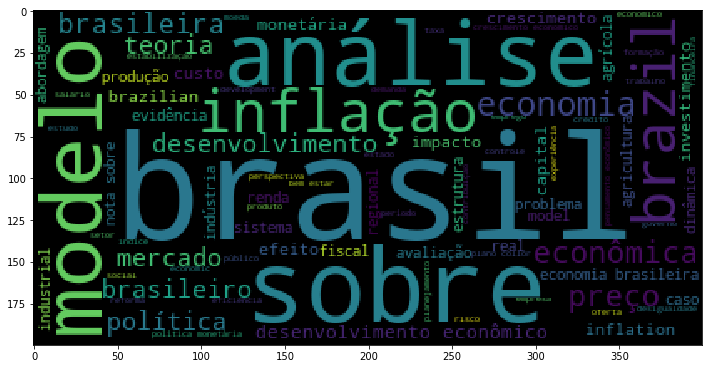

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

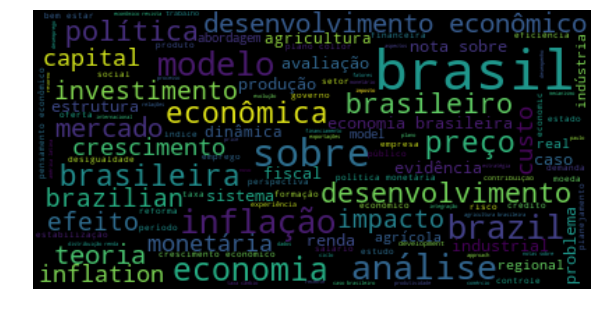

In [13]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(cleaned)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
# The pil way (if you don't have matplotlib)
image = wordcloud.to_image()
image.show()

Loading second corpus

In [15]:
print('Files in the folder:')
for i, w in enumerate(onlyfiles[0:]):
    print(i+1, '--' ,w)

Files in the folder:
1 -- ARTIGOS-RBE-COM-RESUMO.xlsx
2 -- AldousHuxley_bravenewworld.pdf
3 -- MarcelProust_EmBuscadoTempoPerdido.pdf
4 -- RobertFrost_Poetry.pdf


In [16]:
raw_texts = ''
for filename in [f for f in onlyfiles if f.endswith('pdf')]:
    text = textract.process(os.path.join(corpuspath,filename)).decode('utf-8')
    print('\nTexto:\n', text[0:50])
    raw_texts += '\n'+ text


Texto:
 Brave New World
Aldous Leonard Huxley
February 6, 

Texto:
 MARCEL PROUST
EM BUSCA DO TEMPO PERDIDO

EM BUSCA 

Texto:
 Classic Poetry Series

Robert Frost
- poems -

Pub


In [17]:
print(len(raw_texts))

7342550


Cleaning and homogenizing texts:

In [18]:
cleaned_texts = raw_texts.lower()
cleaned_texts = re.sub(' +',' ', cleaned_texts) #Remove multiple spaces
cleaned_texts = re.sub(r'\n\s*\n', '\n', cleaned_texts)

In [19]:
print(len(cleaned_texts))

7339946


In [20]:
print(cleaned_texts[0:200])


brave new world
aldous leonard huxley
february 6, 2002
contents
one
5
two
17
three
25
four
41
2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 45
five
51
2 . . . . . . . . . . . . 


In [21]:
list_words = cleaned_texts.split()
list_words = [l.strip().lower() for l in list_words]
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords]

freqdist = Counter(list_words)
freqdist.most_common(30)

[('é', 6892),
 ('tão', 3050),
 ('sra', 3014),
 ('bem', 2740),
 ('pois', 2667),
 ('sr', 2536),
 ('albertine', 2402),
 ('ainda', 2276),
 ('ser', 2211),
 ('tempo', 2209),
 ('mim', 2148),
 ('ter', 2045),
 ('casa', 2018),
 ('onde', 1960),
 ('havia', 1871),
 ('vida', 1771),
 ('swann', 1766),
 ('guermantes', 1729),
 ('assim', 1689),
 ('menos', 1688),
 ('sobre', 1670),
 ('vezes', 1650),
 ('dia', 1580),
 ('vez', 1549),
 ('talvez', 1479),
 ('todos', 1420),
 ('pouco', 1405),
 ('disse', 1403),
 ('pessoas', 1392),
 ('fazer', 1389)]

Finding ocurrences of an expression:

In [22]:
expression = ' life '
pos = 0 
positions = []
while pos != -1:
    position = cleaned_texts.find(expression,pos+1)
    pos = position
    positions.append(position)
positions.pop()
print('The expression is found {} times'.format(len(positions)))

The expression is found 20 times


Understanding contexts in which words occur:

In [23]:
# Pure Python
window = 8
for position in positions[0:10]:
    print(cleaned_texts[position - window:position + window + len(expression)].strip())

-all his life long. th
through life without
all his life from the
r larger life has but
n in his life before.
beating, life seemed t
ning her life by givin
ivilized life in all i
rpose of life was not
of their life together


In [24]:
# Using NLTK
tknzr = nltk.tokenize.WordPunctTokenizer()
tokens = tknzr.tokenize(cleaned_texts)
nltk_text = nltk.Text(tokens)
nltk_text.concordance(expression.lower(), width=120, lines=10)

No matches


Words that occur in similar contexts than the query expression:

In [25]:
nltk_text.similar(expression)

No matches


[Collocations](http://en.wikipedia.org/wiki/Collocation) are expressions of multiple words which commonly co-occur.  
http://www.nltk.org/howto/collocations.html  

In [26]:
nltk_text.collocations(num=100, window_size=2)

minha avó; muitas vezes; sem dúvida; que ela; além disso; que não;
para mim; que ele; minha mãe; poetry archive; cada vez; uma mulher;
desse modo; pelo menos; meu pai; por exemplo; muito bem; por causa;
uma espécie; primeira vez; dia seguinte; frost www; mais tarde; minha
tia; muito tempo; mesma forma; não podia; não era; robert frost; meus
pais; uma pessoa; outro lado; todo caso; naquele momento; nem sequer;
que lhe; alguma coisa; pelo contrário; mesmo tempo; coisa alguma; tal
modo; ter sido; seus olhos; uma vez; não sei; modo algum; pela
primeira; algum tempo; visto que; por isso; sua vida; tudo isso; não
tinha; num tom; meu quarto; não que; até então; pessoas que; seu
rosto; com uma; das pessoas; alta sociedade; teria sido; dos verdurin;
alguns dias; aos olhos; todo mundo; mim mesmo; ainda mais; meu tio;
passo que; uma certa; meu caro; aos poucos; victor hugo; que nos;
creio que; nós mesmos; por uma; assim como; mas também; dos outros;
meu avô; por fim; ela não; mau humor; outra coi

Below we are using [Pointwise Mutual Information](http://en.wikipedia.org/wiki/Pointwise_mutual_information).

In [27]:
max_items = 30
freq_min_b = 10
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(nltk_text)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print(a, b)

sarah bernhardt
fernando py
1 °
george sand
mustapha mond
vossa senhoria
victor hugo
lanterna mágica
synthetic music
jesus cristo
brave new
du boulbon
luís xiv
século xix
marcel proust
helmholtz watson
vossa alteza
século xviii
des laumes
século xvii
le champi
françoís le
frost www
poetry archive
greater being
condessa molé
henry foster
etc .,
rei teodósio
reunião noturna


In [28]:
for a, b in (finder2.above_score(bigram_measures.raw_freq, 1000.0 / len(list(nltk.bigrams(tokens))))):
        print(a, b)

que o
o que
que não
que a
de um
em que
de uma
e que
que eu
que se
de que
a sra
que ela
o sr
que me
de guermantes
que ele
e a
do que
com a
não se
de charlus
de sua
com o
o seu
e o
e de
como se


In [29]:
max_items = 30
freq_min_t = 6
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(nltk_text)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['da', 'de', 'das'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print(a, b, c)

bel et bien
des deux mondes
revue des deux
françoís le champi
better than mending
brave new world
ending is better
snarled and rattled
shrugged his shoulders
doutor du boulbon
said mustapha mond
half an hour
robert frost www
the assistant predestinator
dia 1 °
years ’ war
s poetry archive
encarregada das duchas
três quartas partes
trinta mil francos
the deputy sub
alameda das acácias
nine years ’
shook his head
princesa des laumes
príncipe des laumes
belongs to every
every one else
crepe da china
shook her head


In [30]:
for a, b, c in finder3.above_score(trigram_measures.raw_freq,100.0 / len(list(nltk.trigrams(tokens)))):
        print (a, b, c)

momento em que
tudo o que
uma espécie de
que o sr
que a sra
ao mesmo tempo
dia em que
que eu não
a impressão de
a fim de
que não se
em vez de
no momento em
ao passo que
em que a
que ela não
na casa da
a idéia de
duquesa de guermantes
em todo caso
todos os dias
casa da sra
que já não
em que o
em que eu
em que se
no dia seguinte
o que me
que o senhor
por um instante
idéia de que
o que se
ponto de vista
mais do que
mais ou menos
o nome de
e que não
por outro lado
o que eu
pela primeira vez
que ele não
s poetry archive
a princesa de
as pessoas que
que a gente
cada vez que
por um momento
don ’ t
em que ela
que não me
um pouco de
é verdade que
robert frost www
a duquesa de
a ponto de
o que não
o que é
por muito tempo
a não ser
princesa de guermantes
a um tempo
que não é
por mais que
princesa de parma
em sua casa
que ela me


In [31]:
from nltk.util import ngrams
n = 4
xgrams = ngrams(tokens, n)
xgrams_counter = Counter(xgrams)
xgrams_counter.most_common(30)

[(('o', 'sr', '.', 'de'), 1317),
 (('sr', '.', 'de', 'charlus'), 1081),
 (('a', 'sra', '.', 'de'), 936),
 (('sra', '.', 'de', 'guermantes'), 508),
 (('a', 'sra', '.', 'verdurin'), 430),
 (('da', 'sra', '.', 'de'), 392),
 (('sra', '.', 'de', 'villeparisis'), 332),
 (('do', 'sr', '.', 'de'), 307),
 (('.', 'de', 'charlus', ','), 305),
 (('que', 'o', 'sr', '.'), 270),
 (('que', 'a', 'sra', '.'), 266),
 ((',', 'a', 'sra', '.'), 249),
 ((',', 'o', 'sr', '.'), 248),
 (('de', 'saint', '-', 'loup'), 240),
 (('.', 'de', 'guermantes', ','), 235),
 (('sr', '.', 'de', 'norpois'), 228),
 (('no', 'momento', 'em', 'que'), 219),
 (('saint', '-', 'loup', ','), 217),
 (('sra', '.', 'verdurin', ','), 191),
 (('a', 'sra', '.', 'swann'), 188),
 (('.', 'a', 'sra', '.'), 186),
 (('sra', '.', 'de', 'cambremer'), 182),
 (('ao', 'sr', '.', 'de'), 172),
 (('.', 'o', 'sr', '.'), 170),
 (('.', 'além', 'disso', ','), 167),
 (('casa', 'da', 'sra', '.'), 165),
 ((',', 'no', 'entanto', ','), 164),
 ((',', 'por', 'exemp

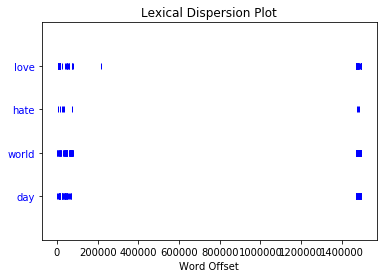

In [32]:
dispersion_words = ['love', 'hate', 'world', 'day']
nltk_text.dispersion_plot(dispersion_words)

Different ways to visualize frequent words:

In [38]:
freqdist.most_common(100)

[('é', 6892),
 ('tão', 3050),
 ('sra', 3014),
 ('bem', 2740),
 ('pois', 2667),
 ('sr', 2536),
 ('albertine', 2402),
 ('ainda', 2276),
 ('ser', 2211),
 ('tempo', 2209),
 ('mim', 2148),
 ('ter', 2045),
 ('casa', 2018),
 ('onde', 1960),
 ('havia', 1871),
 ('vida', 1771),
 ('swann', 1766),
 ('guermantes', 1729),
 ('assim', 1689),
 ('menos', 1688),
 ('sobre', 1670),
 ('vezes', 1650),
 ('dia', 1580),
 ('vez', 1549),
 ('talvez', 1479),
 ('todos', 1420),
 ('pouco', 1405),
 ('disse', 1403),
 ('pessoas', 1392),
 ('fazer', 1389),
 ('tanto', 1383),
 ('sempre', 1377),
 ('dizer', 1360),
 ('modo', 1347),
 ('nada', 1332),
 ('porque', 1312),
 ('então', 1307),
 ('tudo', 1296),
 ('charlus', 1243),
 ('momento', 1202),
 ('antes', 1168),
 ('outro', 1149),
 ('mulher', 1147),
 ('verdurin', 1145),
 ('apenas', 1139),
 ('todo', 1138),
 ('senhor', 1131),
 ('mesma', 1122),
 ('ver', 1120),
 ('quanto', 1078),
 ('olhos', 1065),
 ('grande', 1063),
 ('todas', 1047),
 ('agora', 994),
 ('diante', 991),
 ('outra', 968),
 

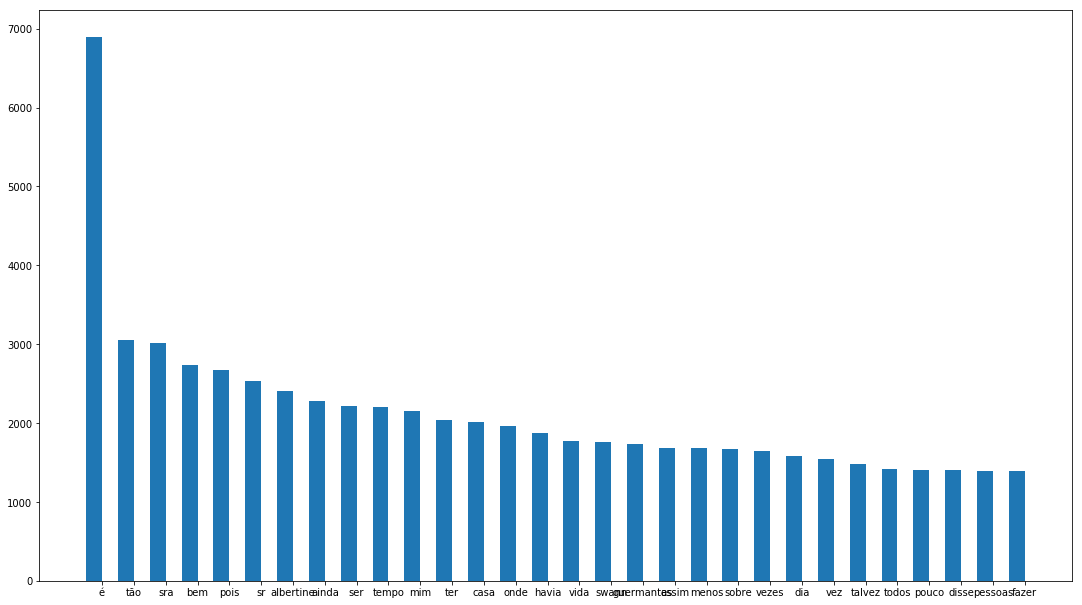

In [53]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

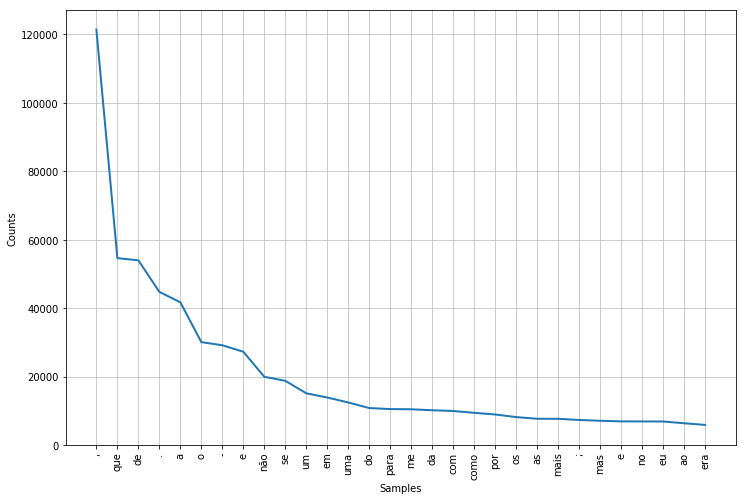

In [54]:
fd_words = nltk.FreqDist(tokens)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8)) 
fd_words.plot(30)

Cumulative distribution of frequencies:

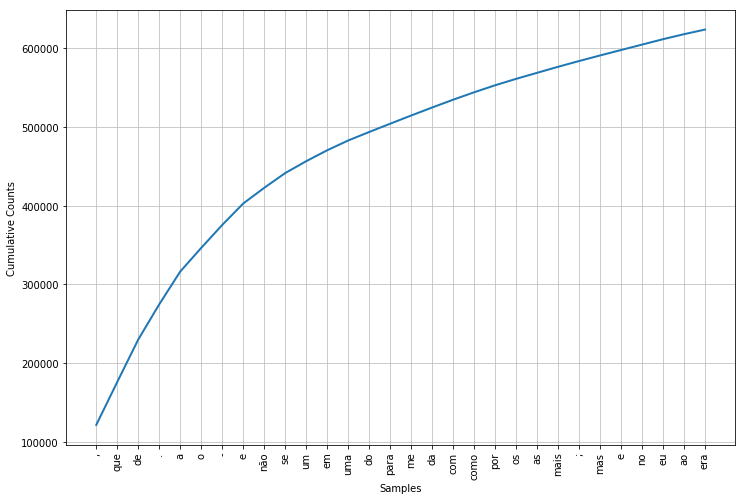

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8)) 
fd_words.plot(30, cumulative = True)

Automated abstracts (not comparable to human made abstracts)

In [58]:
def score_sentences(sentences, important_words):
    # Approach taken from "The Automatic Creation of Literature Abstracts" by H.P. Luhn
    CLUSTER_THRESHOLD = 5  # Distance between words to consider
    scores = []
    sentence_idx = -1
    #for s in [nltk.tokenize.word_tokenize(s) for s in sentences]:
    punktw2 = nltk.tokenize.WordPunctTokenizer() #trocando pelo punkt (melhor?)
    for s in [punktw2.tokenize(s) for s in sentences]:    
        sentence_idx += 1
        word_idx = []
        # For each word in the word list...
        for w in important_words:
            try:
                # Compute an index for where any important words occur in the sentence
                word_idx.append(s.index(w))
            except ValueError as e: # w not in this particular sentence
                pass
        word_idx.sort()
        # It is possible that some sentences may not contain any important words at all
        if len(word_idx)== 0: continue
        # Using the word index, compute clusters by using a max distance threshold
        # for any two consecutive words
        clusters = []
        cluster = [word_idx[0]]
        i = 1
        while i < len(word_idx):
            if word_idx[i] - word_idx[i - 1] < CLUSTER_THRESHOLD:
                cluster.append(word_idx[i])
            else:
                clusters.append(cluster[:])
                cluster = [word_idx[i]]
            i += 1
        clusters.append(cluster)
        # Score each cluster. The max score for any given cluster is the score 
        # for the sentence
        max_cluster_score = 0
        for c in clusters:
            significant_words_in_cluster = len(c)
            total_words_in_cluster = c[-1] - c[0] + 1
            score = 1.0 * significant_words_in_cluster \
                * significant_words_in_cluster / total_words_in_cluster
            if score > max_cluster_score:
                max_cluster_score = score
        scores.append((sentence_idx, score))
    return scores

In [59]:
def summarize(txt):
    N = 100  # Number of words to consider
    punkts = nltk.tokenize.PunktSentenceTokenizer() #trocando pelo punkt (melhor?)
    punktw = nltk.tokenize.WordPunctTokenizer() #trocando pelo punkt (melhor?)
    #sentences = [s for s in nltk.tokenize.sent_tokenize(txt)]
    sentences = [s for s in punkts.tokenize(txt)]
    normalized_sentences = [s.lower() for s in sentences]
    words = [w.lower() for sentence in normalized_sentences for w in punktw.tokenize(sentence)]
    fdist = nltk.FreqDist(words)
    top_n_words = [w[0] for w in fdist.items() if w[0] not in stopwords][:N]
    scored_sentences = score_sentences(normalized_sentences, top_n_words)
    return sentences, top_n_words, scored_sentences

In [60]:
sentences, top_n_words, scored_sentences = summarize(texts)
print(top_n_words)

['miséria', 'abundância', ':', 'alguns', 'modelos', 'crescimento', 'economias', 'subdesenvolvidas', 'comentário', 'sobre', 'modelo', 'econométrico', 'tinther', ',', 'brasil', 'modernização', 'desigualdade', 'agricultura', 'brasileira', 'optimal', 'insider', 'strategy', 'law', 'penalties', 'demands', 'short', 'run', 'assets', 'liabilities', 'brazil', 'portfolio', 'approach', 'reparos', 'teoria', 'multiplicador', 'introdução', 'origens', 'históricas', 'subdesenvolvimento', 'contemporâneo', 'princípios', 'reformulação', 'política', 'comercial', 'reforma', 'economia', 'socialista', 'lições', 'primeiros', 'três', 'anos', 'intensidades', 'fatoriais', 'novo', 'teste', 'empírico', 'teorema', 'heckscher', 'ohlin', 'algumas', 'considerações', 'fases', 'desenvolvimento', 'econõmico', 'poupança', 'econômico', 'padrões', 'convergência', 'divergência', 'regional', 'migrações', '1940', '1960', 'octavio', 'gouveia', 'bulhões', 'orientação', 'controle', 'economic', 'theory', 'regulation', 'case', 'agra

In [61]:
# First approach:
# Filter out non-significant sentences by using the average score plus a
# fraction of the std dev as a filter
avg = np.mean([s[1] for s in scored_sentences])
std = np.std([s[1] for s in scored_sentences])
mean_scored = [(sent_idx, score) for (sent_idx, score) in scored_sentences if score > avg + 0.5 * std]
mean_scored_summary=[sentences[idx] for (idx, score) in mean_scored]
mean_scored_summary = list(set(mean_scored_summary))

for s in mean_scored_summary[0:10]:
    print(s, '\n')

Flexibilidade salarial , equilibrio com desemprego e desemprego de desequilíbrio Renda Social do Nordeste Econometria e verificação de teorias econômicas O Ensino de Economia em Nível de Pós-Graduação no Brasil The Impact of the International Coffee Agreement on the Price of Coffee Shortcomings of the Brazilian Pre-Salt Auction Design Mecanismos de Apoio às Micro e Pequenas Empresas Brasileiras: o caso Patme no Período 1991-98 Inflação Reprimida e Reforma Monetária na Alemanha Ocidental A inflação brasileira e a controvérsia sobre a aceleração inflacionária A unidade salarial e o multiplicador na Teoria Geral de Keynes Bonds, interest and capital accumulation Indexação e realimentação: a hipótese do caminho aleatório O Investimento Acelerado como Força de Desenvolvimento Econômico Distribuição de renda pessoal no Brasil : 1970 e 1980 Análise Técnica: Sorte ou Realidade? 

O Pensamento Econômico em Revistas Taxas de juros e depósitos em moeda estrangeira no Brasil: um comentário Metodol

In [62]:
# Second Approach: 
# Return only the top N ranked sentences
TOP_SENTENCES = 10  # Number of sentences to choose on "top n"
top_n_scored = sorted(scored_sentences, key=lambda s: s[1])[-TOP_SENTENCES:]
top_n_scored = sorted(top_n_scored, key=lambda s: s[0])
top_n_summary=[sentences[idx] for (idx, score) in top_n_scored]
top_n_summary = list(set(top_n_summary))

for s in top_n_summary[0:10]:
    print(s, '\n')

Flexibilidade salarial , equilibrio com desemprego e desemprego de desequilíbrio Renda Social do Nordeste Econometria e verificação de teorias econômicas O Ensino de Economia em Nível de Pós-Graduação no Brasil The Impact of the International Coffee Agreement on the Price of Coffee Shortcomings of the Brazilian Pre-Salt Auction Design Mecanismos de Apoio às Micro e Pequenas Empresas Brasileiras: o caso Patme no Período 1991-98 Inflação Reprimida e Reforma Monetária na Alemanha Ocidental A inflação brasileira e a controvérsia sobre a aceleração inflacionária A unidade salarial e o multiplicador na Teoria Geral de Keynes Bonds, interest and capital accumulation Indexação e realimentação: a hipótese do caminho aleatório O Investimento Acelerado como Força de Desenvolvimento Econômico Distribuição de renda pessoal no Brasil : 1970 e 1980 Análise Técnica: Sorte ou Realidade? 

Estrutura e Eficiência da Economia Agrícola Soviética Colloreconomics Produção e Exportação de Algodão: Efeitos de 

#### [Goose](https://github.com/goose3/goose3)

Extracting text from html pages  

In [63]:
from goose3 import Goose

url = 'http://edition.cnn.com/2012/02/22/world/europe/uk-occupy-london/index.html?hpt=ieu_c2'
g = Goose(Goose({'use_meta_language': False, 'target_language':'en', 'parser_class':'lxml'}))

article = g.extract(url=url)

In [64]:
article.title

'Occupy London loses eviction fight'

In [65]:
article.meta_description

"Occupy London protesters who have been camped outside the landmark St. Paul's Cathedral for the past four months lost their court bid to avoid eviction Wednesday in a decision made by London's Court of Appeal."

In [66]:
article.cleaned_text[:150]

"Occupy London protesters who have been camped outside the landmark St. Paul's Cathedral for the past four months lost their court bid to avoid evictio"

In [67]:
article.top_image.src

'http://cdn.cnn.com/cnnnext/dam/assets/111230083702-mclaughlin-uk-occupy-london-00021228-story-top.jpg'

#### [Textblob](http://textblob.readthedocs.io/en/dev/)

https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/

Installing:  

!sudo pip3 install -U textblob  
!python -m textblob.download_corpora

In [68]:
from textblob import TextBlob
from textblob import Word

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

text_pt = '''
Com uma abordagem inédita, o curso de Mestrado em Modelagem Matemática 
integra à Matemática Aplicada o corpo de conhecimentos das Ciências da 
Computação e da Informação, com contextos de aplicações das ciências 
sociais, econômicas, biológicas e da saúde. O curso possibilita ao 
mestrando desenvolver a capacidade de analisar cenários e dar suporte 
à tomada de decisões em situações de uso intensivo de dados e informações, 
além de ter o objetivo de formar excelentes pesquisadores na área.
'''

In [69]:
blob = TextBlob(text)
blob_pt = TextBlob(text_pt)

In [70]:
blob.sentences

[Sentence("
 The titular threat of The Blob has always struck me as the ultimate movie
 monster: an insatiably hungry, amoeba-like mass able to penetrate
 virtually any safeguard, capable of--as a doomed doctor chillingly
 describes it--"assimilating flesh on contact."),
 Sentence("Snide comparisons to gelatin be damned, it's a concept with the most
 devastating of potential consequences, not unlike the grey goo scenario
 proposed by technological theorists fearful of
 artificial intelligence run rampant.")]

In [71]:
blob_pt.sentences

[Sentence("
 Com uma abordagem inédita, o curso de Mestrado em Modelagem Matemática 
 integra à Matemática Aplicada o corpo de conhecimentos das Ciências da 
 Computação e da Informação, com contextos de aplicações das ciências 
 sociais, econômicas, biológicas e da saúde."),
 Sentence("O curso possibilita ao 
 mestrando desenvolver a capacidade de analisar cenários e dar suporte 
 à tomada de decisões em situações de uso intensivo de dados e informações, 
 além de ter o objetivo de formar excelentes pesquisadores na área.")]

In [72]:
blob.sentences[1].words

WordList(['Snide', 'comparisons', 'to', 'gelatin', 'be', 'damned', 'it', "'s", 'a', 'concept', 'with', 'the', 'most', 'devastating', 'of', 'potential', 'consequences', 'not', 'unlike', 'the', 'grey', 'goo', 'scenario', 'proposed', 'by', 'technological', 'theorists', 'fearful', 'of', 'artificial', 'intelligence', 'run', 'rampant'])

Functions applied to the Word object:  

In [73]:
blob.sentences[1].words.singularize()

WordList(['Snide', 'comparison', 'to', 'gelatin', 'be', 'damned', 'it', "'", 'a', 'concept', 'with', 'the', 'most', 'devastating', 'of', 'potential', 'consequence', 'not', 'unlike', 'the', 'grey', 'goo', 'scenario', 'proposed', 'by', 'technological', 'theorist', 'fearful', 'of', 'artificial', 'intelligence', 'run', 'rampant'])

In [74]:
w = Word('Platform')
w.pluralize()

'Platforms'

Lemmatization  

In [75]:
w = Word('running')
w.lemmatize("v") ## v here represents verb

'run'

POS tags  

In [76]:
blob.tags[0:10]

[('The', 'DT'),
 ('titular', 'JJ'),
 ('threat', 'NN'),
 ('of', 'IN'),
 ('The', 'DT'),
 ('Blob', 'NNP'),
 ('has', 'VBZ'),
 ('always', 'RB'),
 ('struck', 'VBN'),
 ('me', 'PRP')]

In [77]:
blob_pt.tags[0:10]

[('Com', 'NNP'),
 ('uma', 'JJ'),
 ('abordagem', 'NN'),
 ('inédita', 'NN'),
 ('o', 'JJ'),
 ('curso', 'NN'),
 ('de', 'IN'),
 ('Mestrado', 'NNP'),
 ('em', 'CC'),
 ('Modelagem', 'NNP')]

Ngrams  

In [78]:
for ngram in blob.ngrams(2):
    print(ngram)

['The', 'titular']
['titular', 'threat']
['threat', 'of']
['of', 'The']
['The', 'Blob']
['Blob', 'has']
['has', 'always']
['always', 'struck']
['struck', 'me']
['me', 'as']
['as', 'the']
['the', 'ultimate']
['ultimate', 'movie']
['movie', 'monster']
['monster', 'an']
['an', 'insatiably']
['insatiably', 'hungry']
['hungry', 'amoeba-like']
['amoeba-like', 'mass']
['mass', 'able']
['able', 'to']
['to', 'penetrate']
['penetrate', 'virtually']
['virtually', 'any']
['any', 'safeguard']
['safeguard', 'capable']
['capable', 'of']
['of', 'as']
['as', 'a']
['a', 'doomed']
['doomed', 'doctor']
['doctor', 'chillingly']
['chillingly', 'describes']
['describes', 'it']
['it', 'assimilating']
['assimilating', 'flesh']
['flesh', 'on']
['on', 'contact']
['contact', 'Snide']
['Snide', 'comparisons']
['comparisons', 'to']
['to', 'gelatin']
['gelatin', 'be']
['be', 'damned']
['damned', 'it']
['it', "'s"]
["'s", 'a']
['a', 'concept']
['concept', 'with']
['with', 'the']
['the', 'most']
['most', 'devastating'

Noun Phrase Extraction

In [79]:
blob.noun_phrases

WordList(['titular threat', 'blob', 'ultimate movie monster', 'amoeba-like mass', 'snide', 'potential consequences', 'grey goo scenario', 'technological theorists fearful', 'artificial intelligence run rampant'])

In [80]:
blob_pt.noun_phrases

WordList(['com', 'uma abordagem inédita', 'o curso', 'mestrado', 'modelagem matemática', 'integra à', 'matemática aplicada', 'o corpo', 'conhecimentos das', 'ciências', 'computação', 'e da', 'informação', 'com contextos', 'aplicações das ciências sociais', 'biológicas e da saúde', 'o curso possibilita ao mestrando desenvolver', 'analisar cenários e dar suporte à tomada', 'decisões em situações', 'uso intensivo', 'dados e informações', 'ter o objetivo', 'formar excelentes pesquisadores na área'])

Sentiment Analysis  

In [81]:
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

0.06000000000000001
-0.34166666666666673


Translation

In [82]:
blob.translate(to="pt")

TextBlob("A ameaça titular do The Blob sempre me pareceu o melhor filme
monstro: uma massa insaciável e faminta, capaz de penetrar
virtualmente qualquer salvaguarda, capaz de - como um médico condenado
descreve isso - "assimilar carne em contato.
Comparações de Snide com gelatina são malditas, é um conceito com a maior
devastador de potenciais consequências, não muito diferente do cenário cinza
proposto por teóricos tecnológicos com medo de
a inteligência artificial corre solta.")

Detecting language

In [83]:
blob_pt.detect_language()

'pt'

Spellcheck

In [84]:
blob = TextBlob('FGV is the bist think tenk in the word!')
blob.correct()

TextBlob("FGV is the best think ten in the word!")

In [85]:
blob.words[5].spellcheck()

[('ten', 0.6656534954407295),
 ('tend', 0.1580547112462006),
 ('tent', 0.0729483282674772),
 ('tens', 0.0486322188449848),
 ('teno', 0.03951367781155015),
 ('tenn', 0.00911854103343465),
 ('tank', 0.0060790273556231)]

Text classification

In [91]:
training = [
('Tom Holland is a terrible spiderman.','neg'),
('a terrible Javert (Russell Crowe) ruined Les Miserables for me...','neg'),
('The Dark Knight Rises is the greatest superhero movie ever!','pos'),
('Fantastic Four should have never been made.','neg'),
('Wes Anderson is my favorite director!','pos'),
('Captain America 2 is pretty awesome.','pos'),
('Let\s pretend "Batman and Robin" never happened..','neg'),
]

testing = [
('Superman was never an interesting character.','neg'),
('Fantastic Mr Fox is an awesome film!','pos'),
('Dragonball Evolution is simply terrible!!','neg')
]

In [92]:
from textblob import classifiers
nb_classifier = classifiers.NaiveBayesClassifier(training)
dt_classifier = classifiers.DecisionTreeClassifier(training)

In [93]:
print (nb_classifier.accuracy(testing))

1.0


In [94]:
nb_classifier.show_informative_features(3)

Most Informative Features
            contains(is) = True              pos : neg    =      2.9 : 1.0
      contains(terrible) = False             pos : neg    =      1.8 : 1.0
             contains(a) = False             pos : neg    =      1.8 : 1.0


In [95]:
blob = TextBlob('the weather is terrible!', classifier=dt_classifier)
print (blob.classify())

pos


#### Basic Polarizing Functions for Sentiment Analysis

Loading the polarized lexycom file - OpLexicon (BR)

In [98]:
df_o = pd.read_csv(os.path.join(datapath,oplexicon), header=None, encoding='utf-8', usecols=[0,2], names=[u'palavra',u'polaridade'])
df_o.drop_duplicates(subset=[u'palavra'], keep='first', inplace=True)
df_o = df_o.set_index(u'palavra')
print(u'Corpus com {} palavras polarizadas'.format(len(df_o)))

Corpus com 32119 palavras polarizadas


In [99]:
def polariza_texto(texto, df1):
    polaridades = []
    ausentes = []
    l_palavras = texto.split()
    for palavra in l_palavras:
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p])
        else:
            ausentes.append(p)
    num_pal = len(l_palavras)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(num_pol) if num_pol else 0.0
    #print('Foram polarizadas {} palavras de um total de {} ({:.2%})'.format(num_pol, num_pal, razao_pol))
    #print('A polaridade mensurada do texto é de {:.3}'.format(polaridade))
    return polaridade, ausentes

In [100]:
def polariza_counter(dicionario, df1):
    polaridades = []
    fator_div = 0
    ausentes = []
    for palavra, frequencia in dicionario.iteritems():
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p] * frequencia)
            fator_div += frequencia
        else:
            ausentes.append((palavra,frequencia))
    num_pal = len(dicionario)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(fator_div)
    print('Foram polarizadas {} palavras de um total de {} ({:.2%})'.format(num_pol, num_pal, razao_pol))
    print('A polaridade mensurada do texto é de {:.3}'.format(polaridade))
    return polaridade, ausentes

In [103]:
score, ausentes = polariza_texto(texts, df_o)
print(score)

0.06378132118451026


### [Spacy](https://spacy.io/)

In [105]:
import spacy